## Supervised Learning and SVM Algorithm

Group 11 : Santosh Sigdel, Prayusha Poudel, Tuo Yan, Binita Acharya

### Part 1 - Familiarization and Basic Testing of SVM

In [7]:
### import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [8]:
# step 1: Load the Dataset (bank.csv)
df = pd.read_csv('bank.csv', sep=';', quotechar='"', encoding='ISO-8859-1', low_memory=False)
print("Shape:", df.shape)
print(df.head())

# step 2: select Numerical Features
NUM_FEATURES = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'euribor3m', 'nr.employed'
]

for col in NUM_FEATURES:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=NUM_FEATURES + ['y'])

# step 3: Define X and Y
X = df[NUM_FEATURES]
y = df['y'].map({'no': 0, 'yes': 1})

#step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Step 5: Train-Test Split(80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#Step 6: Run SVM with Different Kernels

#   a. Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
pred_linear = svm_linear.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, pred_linear))
print(classification_report(y_test, pred_linear))


Shape: (41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent      1.tammi   
1   may         mon  ...         1    999         0  nonexistent      1.tammi   
2   may         mon  ...         1    999         0  nonexistent      1.tammi   
3   may         mon  ...         1    999         0  nonexistent      1.tammi   
4   may         mon  ...         1    999         0  nonexistent      1.tammi   

  cons.price.idx  cons.conf.idx  euri

In [4]:
# b. Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
pred_poly = svm_poly.predict(X_test)

print("Polynomial Kernel Accuracy:", accuracy_score(y_test, pred_poly))
print(classification_report(y_test, pred_poly))

Polynomial Kernel Accuracy: 0.8266048974189278
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2376
           1       0.68      0.35      0.46       646

    accuracy                           0.83      3022
   macro avg       0.76      0.65      0.68      3022
weighted avg       0.81      0.83      0.80      3022



In [5]:
# c. RBF Kernel (Most Common SVM kernel)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, pred_rbf))
print(classification_report(y_test, pred_rbf))

RBF Kernel Accuracy: 0.8342157511581734
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2376
           1       0.67      0.45      0.53       646

    accuracy                           0.83      3022
   macro avg       0.77      0.69      0.72      3022
weighted avg       0.82      0.83      0.82      3022



### Part 2 - In Depth Experimentation with SVM

1 Parameter Experimentation: Varying C

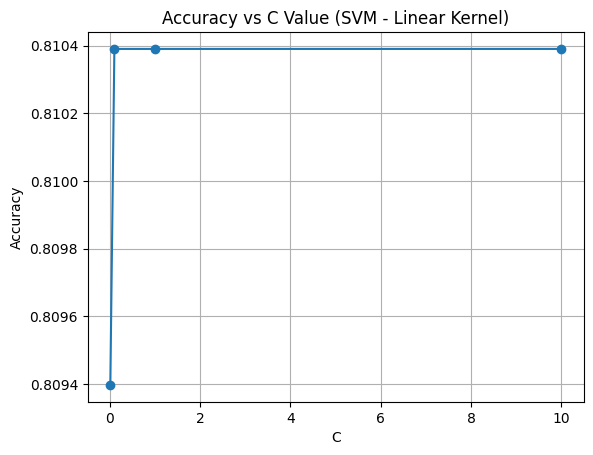

In [10]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_values = [0.01, 0.1, 1, 10]
accuracies = []

for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))

plt.plot(C_values, accuracies, marker='o')
plt.title("Accuracy vs C Value (SVM - Linear Kernel)")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()



2. Kernel Comparison on Dataset

In [9]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Kernel = {k} → Accuracy = {accuracy_score(y_test, pred):.4f}")


Kernel = linear → Accuracy = 0.8104
Kernel = poly → Accuracy = 0.8266
Kernel = rbf → Accuracy = 0.8342
